# CS 506 Spring 2021 - HW3
## Social Networks and Recommendataion Systems
#### Total: 25 Points

##### Package Limitations: None

### Name:Yufan Lin
### BU ID:U16678507
### BU Email:eric1025@bu.edu
#### People you worked with on this hw:

### 1. Background

In this homework, you will try to recommend new collaborations to researchers of the Machine Learning community. Our approach will follow the guidelines of collaborative filtering: “**If your past behavior/preferences were similar to some other user’s, your future behavior may be as well**”. As an example, imagine you like Rolling Stones, Beatles and Jimmy Hendrix. It turns out that most people that like the aforementioned artists, are also fans of Eric Clapton. Then, it is very likely that if you listen to Eric Clapton’s music, you will like it as well.

In this assignment you will implement a **collaborative filtering recommendation system** for suggesting new collaborations to Machine Learning researchers.

**A network as a graph**: A graph or network represents relationships among different entities (users of a social network, researchers, products, etc.). Those entities are represented as nodes and the relationships between them (friends on Facebook, co-authors of a research paper, products purchased together) as edges. When there is an edge between two nodes, x and y, we say that y is a neighbor (or friend) of x (and also - as the graphs we consider are undirected - x is also a neighbor of y).

**Representing a graph in Python**: A widely used library in Python, for representing graphs is [NetworkX](https://networkx.github.io/documentation/stable/). You can read the documentation for more information on how to use this library.

### 2. Recommend new collaborations - The ML Community case 

In order to provide new collaborations and test the efficiency of the methods used, you are given two files (you can find them on piazza):

- ”old edges.txt”: In this file, every line contains the names of two re- searchers that have co-authored a paper in one of the top Machine Learn- ing conferences (NeurIPS, ICLR, ICML) between 2010 and 2016.
- ”new edges.txt”: In this file, every line contains the names of two re- searchers (from those existing in the above file) that formed a new (non- existing before) collaboration, in either 2017 and 2018.

With the first file in hand, you will answer the following question:
“For author X, list some non-collaborators in order, starting with the best col- laborator recommendation and ending with the worst”. A non-friend is a user who is not X and is not a collaborator of X. Depending on the recommendation algorithm you are going to choose, the list may include all non-collaborators or some of them.

Then, using the second file, with actual new collaborations formed in the next 3 years, you will test the efficiency of these algorithms.


### Tasks
a) [3 pts.] Write a function that reads the file “old edges.txt” and create a graph using NetworkX. (This is a tab-separated value (TSV) file, you may use packages such as Pandas to read it. )


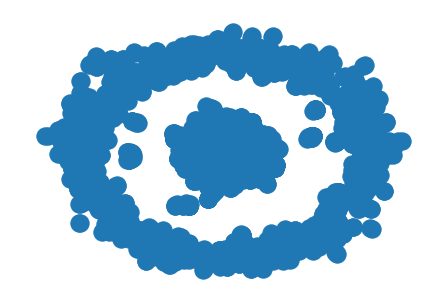

In [21]:
# You can add functions, inputs outputs to existing functions. 
# Please do NOT change name of the existing functions

from typing import Tuple, List, Dict, Callable
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def read_old_edges(file_path: str):
    """
    read old edges text file and return a NetworkX graph
    
    :param file_path: string file path to old_edges.txt
    :return: g: the nx graph, old_graph_authors: the authors in the file 
    """
    data=pd.read_table(file_path,sep='\t')              #read the file and seperate values by tab
    data=np.array(data)
    # print(data[1])
    # print(np.shape(data))
    old_graph_authors=np.unique(data)                             #find the authors(nodes)
    relationship=[]
    for i in range(len(data)):                              #find the relationship(edges)
        relationship.append([data[i][0],data[i][1]])
    # print(len(unique_data))
    # print(len(relationship))
    g=nx.Graph()                                                #draw the nx graph
    g.add_nodes_from(old_graph_authors)
    g.add_edges_from(relationship)
    nx.draw(g)
    plt.show()  
    return g,old_graph_authors                                          #return the authors

old_graph,old_graph_authors=read_old_edges(file_path='C:/Users/dell/Desktop/cs506hw3/homework-3-Kotoric1-main/old_edges.txt')
    

b) [3 pts.] Write a function that reads the file “new edges.txt” and for each author, keeps track of the new collaborations this user formed during 2017-2018.


In [2]:
def read_new_edges(file_path: str):
    """
    read new edges text file
    
    :param file_path: string file path to new_edges.txt
    :return: G: the nx graph, new_graph_authors: the authors in the file 
    """
    data=pd.read_table(file_path,sep='\t')              #similar to question a using pd.read_table
    data=np.array(data)
    # print(np.shape(data))
    new_graph_authors=np.unique(data)                   
    relationship=[]
    for i in range(len(data)):                          #get the relatinship(edges)
        relationship.append([data[i][0],data[i][1]])
    # print(len(unique_data))
    # print(len(relationship))
    G=nx.Graph()                                        #plot the nx graph
    G.add_nodes_from(new_graph_authors)
    G.add_edges_from(relationship)
    nx.draw(G)
    plt.show()
    return G,new_graph_authors                      #return the nx graph and the authors for testing question c

    

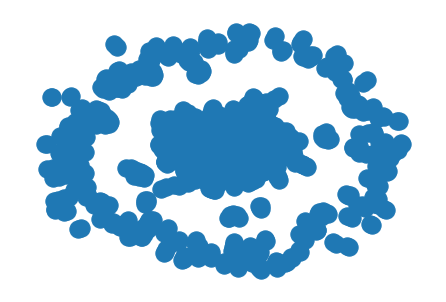

In [3]:
new_graph,new_graph_authors=read_new_edges(file_path='C:/Users/dell/Desktop/cs506hw3/homework-3-Kotoric1-main/new_edges.txt')

In 2017 and 2018, there were 1,757 new edges formed between existing authors. For the next tasks, pick (and recommend new collaborations for) those authors that formed at least 10 new connections between 2017-2018. In the remaining, when we talk about author X, we refer to one of those authors.

c) [5 pts.] **Recommend by number of common friends**

The intuition behind this recommendation algorithm is that if non-friend Y is your friend’s friend, then maybe Y should be your friend too. If person Y is the friend of many of your friends, then Y is an even better recommendation. 

In [18]:
def common_friends_number(graph: nx.Graph, author,authors) -> List[str]:
    """
    Return list of authors who have a common neighbor as 
    given author sorted by number of common friends. 
    
    :param graph: collaboration graph in nextworkX, author: given author to find it's common neighbors; authors:list of authors
    :return: list of new collaborators' name to recommend
    """
    edges_list=nx.to_dict_of_lists(graph)                       #convert the nx graph to dict to get the edges
    # print(len(edges_list))
    # print(edges_list[author])
    collarborators=np.array(edges_list[author])                 #find the exist collaborators fo the given author
    count_list=[]
    other_authors=[]
    # print(len(authors))
    for i in authors:                                               #delete the author and his collaborators from the author list
        if(i != author and i not in collarborators):
            other_authors.append(i)
    # print(len(other_authors))
    # print(other_authors[0])   
    for i in other_authors:                                         #count the number of common friends for each other author in the author list
        count=0         
        for j in collarborators:
            if(j in np.array(edges_list[i])):
                count=count+1
        count_list.append(count)
    # print(count_list)
    # print(other_authors[count_list.index(max(count_list))])
    other_author_df=pd.DataFrame()                                          # create a new df to store the authors and their recommendation level(number of close friends)
    other_author_df['author']=other_authors
    other_author_df['recommendation']=count_list
    other_author_df.sort_values(by="recommendation" , inplace=True, ascending=False)            #sort it with descending order
    sorted_authors=list(other_author_df['author'])
    # print(len(sorted_authors))
    # print(other_author_df)
    return sorted_authors                                                                                #return the sorted new collaborators

new_collaborators=common_friends_number(graph=old_graph,author='Aaron C. Courville',authors=old_graph_authors)    
print(new_collaborators[:10])

['Ryan P. Adams', 'Yuhuai Wu', 'Raquel Urtasun', 'Sanja Fidler', 'Nebojsa Jojic', 'Brendan J. Frey', 'Roland Memisevic', 'Zhouhan Lin', 'Jasper Snoek', 'Antonio Torralba 0001']


d) [5 pts.] **Make recommendations using Jaccard’s Index**

If Γ(X) is the set of neighbors of X, then the metric we used in part (c), assigns to a non-friend y, the following recommendation score (with respect to X): score(y) = |Γ(X)∩Γ(y)|. Jaccard’s Index scales this score by taking into account the union of X and Y ’s neighbors. Intuitively, X and Y are more similar, if what they have in common is as close as possible to what they have together.


In [19]:
def jaccard_index(graph: nx.Graph, author,authors) -> List[str]:
    """
    Return list of authors who have a common neighbor as 
    given author sorted by Jaccard Index (see pdf for equation) 
    
    :param graph: collaboration graph in nextworkX, author: given author to find it's common neighbors; authors:list of authors
    :return: list of new collaborators' name to recommend
    """
    edges_list=nx.to_dict_of_lists(graph)                       #convert the nx graph to dict to get the edges
    # print(len(edges_list))
    # print(edges_list[author])
    collarborators=np.array(edges_list[author])                 #find the exist collaborators fo the given author
    jaccard_index_list=[]
    other_authors=[]
    # print(len(authors))
    for i in authors:                                               #delete the author and his collaborators from the author list
        if(i != author and i not in collarborators):
            other_authors.append(i)
    # print(len(other_authors))
    # print(other_authors[0])   
    for i in other_authors:                                         #count the intersection for the set of neighbors of the author and the set of neighbors for each other authors
        count=0         
        for j in collarborators:
            if(j in np.array(edges_list[i])):
                count=count+1
        jaccard_index_list.append(count/(len(collarborators)+len(np.array(edges_list[i]))-count))   #use the length of the set of neighbors of the author and the set of neighbors
                                                                                                    #minus the intersection to get the unions of those sets and sort it in a list
    other_author_df=pd.DataFrame()                                          # create a new df to store the authors and their recommendation score
    other_author_df['author']=other_authors
    other_author_df['recommendation']=jaccard_index_list
    other_author_df.sort_values(by="recommendation" , inplace=True, ascending=False)            #sort it with descending order
    sorted_authors=list(other_author_df['author'])
    # print(len(sorted_authors))
    return sorted_authors

jaccard_index_collaborators=jaccard_index(graph=old_graph,author='Aaditya Ramdas',authors=old_graph_authors)
print(jaccard_index_collaborators[:10])

['Wicher Bergsma', 'Maria Lomeli Garcia', 'Samuel Livingstone', 'Christophe Andrieu', 'Heiko Strathmann', 'Jovana Mitrovic', 'Martin Azizyan', 'James Sharpnack', 'Yevgeniy Vorobeychik', 'Bo Li 0026']


e)  [5 pts.] **Make recommendations using Adamic/Adar Index**

For part (c), we made recommendations using common neighbors. However, when assigning a score to Y , instead of just taking a count of the number of common neighbors, we take a weighted sum of them, where the weight of each common neighbor of X and Y , call her Z, is the inverse of the logarithm of the number of Z’s neighbors. In that way, we value more common neighbors that are more selective.

In [16]:
import math
def adamic_adar_index(graph: nx.Graph, author,authors) -> List[str]:
    """
    Return list of recommendations of a given author sorted 
    by Adamic / Adar Index (see pdf for equation) 
    
    :param graph: collaboration graph in nextworkX, author: given author to find it's common neighbors; authors:list of authors
    :return: list of new collaborators' name to recommend
    """
    edges_list=nx.to_dict_of_lists(graph)                       #convert the nx graph to dict to get the edges
    # print(len(edges_list))
    # print(edges_list[author])
    collarborators=np.array(edges_list[author])                 #find the exist collaborators fo the given author
    adamic_adar_index_list=[]
    other_authors=[]
    # print(len(authors))
    for i in authors:                                               #delete the author and his collaborators from the author list
        if(i != author and i not in collarborators):
            other_authors.append(i)
    # print(len(other_authors))
    # print(other_authors[0])   
    for i in other_authors:                                         #count the score for each other_author
        count=0         
        for j in collarborators:
            if(j in np.array(edges_list[i])):                                              #use math.log(,base) for log calculation
                count=count+1/math.log((len(np.array(edges_list[j]))),10)               #use the cummulative sum of 1/length of log(number of neibors) as the score
        adamic_adar_index_list.append(count) 
    # print(adamic_adar_index_list)
    other_author_df=pd.DataFrame()                                          # create a new df to store the authors and their recommendation score
    other_author_df['author']=other_authors
    other_author_df['recommendation']=adamic_adar_index_list
    other_author_df.sort_values(by="recommendation" , inplace=True, ascending=False)            #sort it with descending order
    sorted_authors=list(other_author_df['author'])
    # print(other_author_df)
    return sorted_authors
adamic_adar_index_collaborators=adamic_adar_index(graph=old_graph,author='Aaron C. Courville',authors=old_graph_authors)
print(adamic_adar_index_collaborators[:10])

['Yuhuai Wu', 'Ryan P. Adams', 'Devon R. Hjelm', 'Nebojsa Jojic', 'Vince D. Calhoun', 'Çaglar Gülçehre', 'Koray Kavukcuoglu', 'Geoffrey E. Hinton', 'Brendan J. Frey', 'Zhouhan Lin']


f) [4 pts.] **How good are the recommendations we make?** 

Previously, you implemented 3 functions, that given a user X provide recommendations for this user. In this task, you will check how good these recommendations are using the actual new connections formed during 2017-2018.

You will use two different ways, to calculate the efficiency of every approach:

- For each user X, take the 10 first recommendations for this user, and calculate the number of them that were actually formed during 2017-2018. You should report the average among users X.

- For each newly formed collaboration of user X, calculate the rank of this collaboration (the index where this new node Y appears in the recommendations list for X). Report the average among newly formed edges.

In [9]:
new_edges_list=nx.to_dict_of_lists(new_graph)       #find the authors that made at least 10 new connections
new_authors=[]
for i in new_graph_authors:
    if(len(np.array(new_edges_list[i]))>=10):
        new_authors.append(i)
print(len(new_authors))
print(new_authors[0])

41
Aaron C. Courville


In [20]:
def top_k_recommendation_accuracy(graph: nx.Graph, index_method: Callable, authors) -> float:
    """
    Among top k recommendations of every user, return average number 
    of recommendations that becomes reality
    
    :param graph: collaboration graph in nextworkX
    :param index_method: function that is used to make recommendation
    :param authors：list of authors
    :return: average accuracy of predictions among all users
    """
    new_edges_list=nx.to_dict_of_lists(new_graph)                         #get the edge list of the new graph which  is the one in the new_edges file
    # print(new_edges_list['Adam Coates'])
    count=0                                                             #set the counters for recording 
    score=0
    for i in range(len(authors)):                                                               #run the index_method for each author in the authors list
        predicted_collaborators=index_method(graph=graph,author=authors[i],authors=authors)        #get the prediction collaborator list 
        # print(authors[i])
        # print(predicted_collaborators[:10])
        # print(new_edges_list[authors[i]])
        new_edges=np.array(new_edges_list[authors[i]])                                                  
        for j in range(10):                                                                     #check the top 10 collaborators
            for k in range(len(new_edges)):                                                     #count the number of similarities 
                if(predicted_collaborators[j] == new_edges[k]):
                    count=count+1    
        score=score+count/10                                                                    #count the total number of similarities
    # print(count)
    average=score/len(authors)                                                                  #count the average accurate number for each author
    accuracy=average/10                                                                         #change it to accuracy
    return accuracy
average_accuracy_common_friends_number=top_k_recommendation_accuracy(graph=old_graph,index_method=common_friends_number,authors=new_authors)    
print(average_accuracy_common_friends_number)
average_accuracy_jaccard_index=top_k_recommendation_accuracy(graph=old_graph,index_method=jaccard_index,authors=new_authors)
print(average_accuracy_jaccard_index)
average_accuracy_adamic_adar_index=top_k_recommendation_accuracy(graph=old_graph,index_method=adamic_adar_index,authors=new_authors)
print(average_accuracy_adamic_adar_index)
    
    
def new_collaboration_rank(graph: nx.Graph, index_method: Callable, authors) -> float:
    """
    Among the new collaborations of every user, return average rank 
    of the collaboration calculated by the function
    
    :param graph: collaboration graph in nextworkX
    :param index_method: function that is used to make recommendation
    :param authors：list of authors
    :return: average rank of predictions among all users
    """
    new_edges_list=nx.to_dict_of_lists(new_graph)                      #get the edge list of the new graph which  is the one in the new_edges file
    total_average_rank=0
    for i in authors:                                                                         #run the index_method for each author in the authors lis
        predicted_collaborators=index_method(graph=graph,author=i,authors=authors)          #get the prediction collaborator list 
        # print(len(predicted_collaborators))
        new_edges=np.array(new_edges_list[i]) 
        total_rank=0                                                 
        for k in range(len(new_edges)):                                         #go through the actual collaborators list                                      
            for j in range(len(predicted_collaborators)):                       # find the rank of the actual collaborators in predicted recommendation collaborator list
                if(j>10):                                                       # if  not in the top 10 of predicted recommendation collaborator list
                    rank=len(predicted_collaborators)+1                         #set the rank to length of recommendation list+1
                else:                                                      
                    if(predicted_collaborators[j] == new_edges[k]):
                        rank=j
            total_rank=total_rank+rank                                          # store the total rank for each actual collaborator
        # print(total_average_rank)
        average_rank=total_rank/len(new_edges)                                  #find the average rank for each actual collaborator
        total_average_rank=total_average_rank+average_rank                      #add it to total rank for every author
    total_average_rank=total_average_rank/len(authors)                             # used the cummulative sum of total rank / number of authors to find the average rank of collaborators for each aurthor
    return total_average_rank
average_rank_common_friends_number=new_collaboration_rank(graph=old_graph,index_method=common_friends_number,authors=new_authors)    
print(average_rank_common_friends_number)
average_rank_jaccard_index=new_collaboration_rank(graph=old_graph,index_method=jaccard_index,authors=new_authors)    
print(average_rank_jaccard_index)
average_rank_adamic_adar_index=new_collaboration_rank(graph=old_graph,index_method=adamic_adar_index,authors=new_authors)    
print(average_rank_adamic_adar_index)
    

0.5141463414634145
0.5241463414634147
0.5182926829268293
39.63414634146341
39.63414634146341
39.63414634146341


e) [**Bonus Question**] [2 pts.]
Doing some literature search, suggest your own algorithm for recommend- ing new links to a user X. Argue about the choice you make, why it makes sense to suggest users that way? How is the efficiency of this algorithm, compared to the ones you implemented in parts (c), (d) and (e)?

In [15]:
def pearson(p,q):                           #helper function for calculating the score
    same = 0
    for i in p:
        if i in q:
            same +=1
    n = same
    if(n==0):                                           #just return zero if no same are found
        return 0
    else:
        sumx = len(p)
        sumy = len(q)
        sumxsq = len(p)**2
        sumysq = len(q)**2
        sumxy = len(p)*len(q)
        up = sumxy - sumx*sumy/n                                    #calculate the pearson index
        down = ((sumxsq - pow(sumxsq,2)/n)*(sumysq - pow(sumysq,2)/n))**.5
        if down == 0 :return 0
        r = up/down
        return r
def pearson_index(graph: nx.Graph, author,authors) -> List[str]:
    """
    Return list of recommendations of a given author sorted 
    by pearson index
    
    :param graph: collaboration graph in nextworkX, author: given author to find it's common neighbors; authors:list of authors
    :return: list of new collaborators' name to recommend
    """
    edges_list=nx.to_dict_of_lists(graph)                       #convert the nx graph to dict to get the edges
    # print(len(edges_list))
    # print(edges_list[author])
    collarborators=np.array(edges_list[author])                 #find the exist collaborators fo the given author
    pearson_index_list=[]
    other_authors=[]
    # print(len(authors))
    for i in authors:                                               #delete the author and his collaborators from the author list
        if(i != author and i not in collarborators):
            other_authors.append(i)
    # print(len(other_authors))
    # print(other_authors[0])   
    for i in other_authors:                                         #count the score for each other_author        
        other_author_edge_list=edges_list[i]
        score=pearson(other_author_edge_list,collarborators)      
        pearson_index_list.append(score) 
    # print(pearson_index_list)
    other_author_df=pd.DataFrame()                                          # create a new df to store the authors and their recommendation score
    other_author_df['author']=other_authors
    other_author_df['recommendation']=pearson_index_list
    other_author_df.sort_values(by="recommendation" , inplace=True, ascending=False)            #sort it with descending order
    sorted_authors=list(other_author_df['author'])
    # print(other_author_df)
    return sorted_authors
pearson_index_collaborators=pearson_index(graph=old_graph,author='Aaron C. Courville',authors=old_graph_authors)
print(pearson_index_collaborators[:10])
# average_accuracy_pearson_index=top_k_recommendation_accuracy(graph=old_graph,index_method=pearson_index,authors=new_authors)    
# print(average_accuracy_pearson_index)
# average_rank_pearson_index=new_collaboration_rank(graph=old_graph,index_method=pearson_index,authors=new_authors)    
# print(average_rank_pearson_index)

#Although the accuracy is not as good as what we did in c,d,e, however, pearson correlation coefficient has its advantage when the data is in high dimention
#The running time of this algorithm is similar to the ones in c,d,e, which results in no improvement of running time


['Mengye Ren', 'Devon R. Hjelm', 'Zhouhan Lin', 'Tong Che', 'Yuhuai Wu', 'Jan Chorowski', 'Dmitriy Serdyuk', 'Dzmitry Bahdanau', 'Vince D. Calhoun', 'Çaglar Gülçehre']
